In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
from scipy.integrate import odeint
%matplotlib notebook
import rebound

In [3]:
def eqDif(q, t, params):
    x, B, y, N, z, D = q
    M, G, l = params
    dervis = [B, ((-3/4)*G*M*(l**2)/(x**4))*(np.cos(y-z))-(G*M/(x**2))*(1+0.375*((l*np.cos(y-z)/x)**2))+x*(N**2), N, (-2/x)*B*N-(3/8)*G*M*(l**2)*np.sin(2*(y-z))*(1/x**5), D, (3/4)*np.sin(2*(y-z))*(1/x**3)]
    return dervis
plt.ioff()

In [13]:
M = 5*10**26
G = 6.674 * 10**(-11)
l = 300000
m = 5*10**18 
params = [M, G, l]
q0 = [1500000000, 0, 0, 0.000001, 0.01, 0.0000001]
t = np.linspace(0, 5*10000000, 120000)

sol = odeint(eqDif, q0, t, args=(params,))

<IPython.core.display.Javascript object>


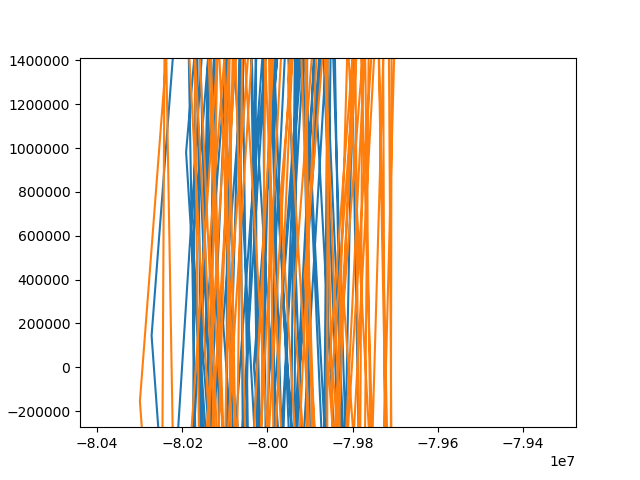

In [14]:

plt.plot(sol[:,0]*np.cos(sol[:,2]),sol[:,0]*np.sin(sol[:,2]))
plt.plot(sol[:,0]*np.cos(sol[:,2])-l*np.cos(sol[:,4]),sol[:,0]*np.sin(sol[:,2])+l*np.sin(sol[:,4]))
plt.plot(0,0,"o")
plt.show()



<IPython.core.display.Javascript object>


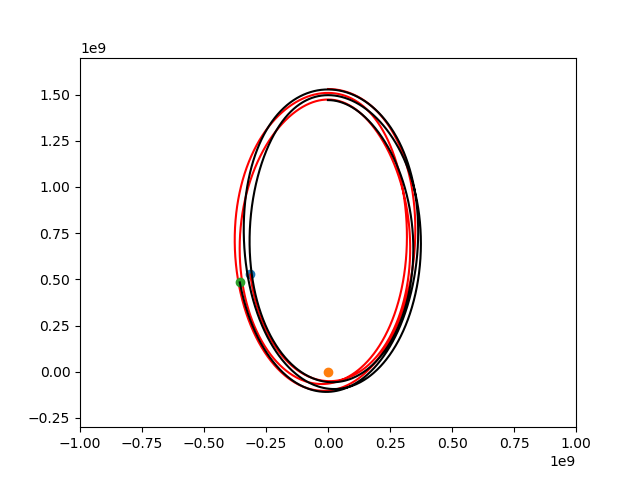

In [11]:



fig, ax = plt.subplots()

t = 0
x = sol[t,0]*np.cos(sol[t,2])
y = sol[t,0]*np.sin(sol[t,2])
point1,  = ax.plot(x,y, "o")


line1, =  ax.plot(x,y, "r")


saturno = ax.plot(0,0, "o", linewidth=1000)

point2,  = ax.plot(x,y, "o")


line2, =  ax.plot(x,y, "k")

def init():
    ax.set_ylim(-0.3e9, 1.7e9)
    ax.set_xlim(-1e9, 1e9)
    return point1,

def animate (i):
    point1.set_ydata(sol[i,0]*np.cos(sol[i,2]) + 100*l*np.cos(sol[i,4]))
    point1.set_xdata(sol[i,0]*np.sin(sol[i,2]) + 100*l*np.sin(sol[i,4]))
    line1.set_ydata(sol[:i,0]*np.cos(sol[:i,2]) + 100*l*np.cos(sol[:i,4]))
    line1.set_xdata(sol[:i,0]*np.sin(sol[:i,2]) + 100*l*np.sin(sol[:i,4]))
    point2.set_ydata(sol[i,0]*np.cos(sol[i,2]) - 100*l*np.cos(sol[i,4]))
    point2.set_xdata(sol[i,0]*np.sin(sol[i,2]) - 100*l*np.sin(sol[i,4]))
    line2.set_ydata(sol[:i,0]*np.cos(sol[:i,2]) - 100*l*np.cos(sol[:i,4]))
    line2.set_xdata(sol[:i,0]*np.sin(sol[:i,2]) - 100*l*np.sin(sol[:i,4]))
    return point1,

ani = animation.FuncAnimation(fig, animate, init_func=init, interval=1, blit=True, save_count=1)


plt.show()

In [11]:
sol

array([[ 1.50000000e+09,  0.00000000e+00,  0.00000000e+00,
         1.00000000e-06,  1.00000000e-02,  1.00000000e-07],
       [ 1.49953705e+09, -1.11116027e+02,  8.33518733e-03,
         1.00061756e-06,  1.08333472e-02,  1.00000000e-07],
       [ 1.49814767e+09, -2.22361684e+02,  1.66806792e-02,
         1.00247438e-06,  1.16666944e-02,  1.00000000e-07],
       ...,
       [ 5.27662315e+08, -8.12997645e+03,  4.03447831e+03,
         8.27675356e-06,  5.00083333e+01,  1.00000000e-07],
       [ 4.56790101e+08, -8.90745839e+03,  4.03455781e+03,
         1.10443540e-05,  5.00091667e+01,  1.00000000e-07],
       [ 3.78622123e+08, -9.89510101e+03,  4.03466849e+03,
         1.60755030e-05,  5.00100000e+01,  1.00000000e-07]])

<IPython.core.display.Javascript object>


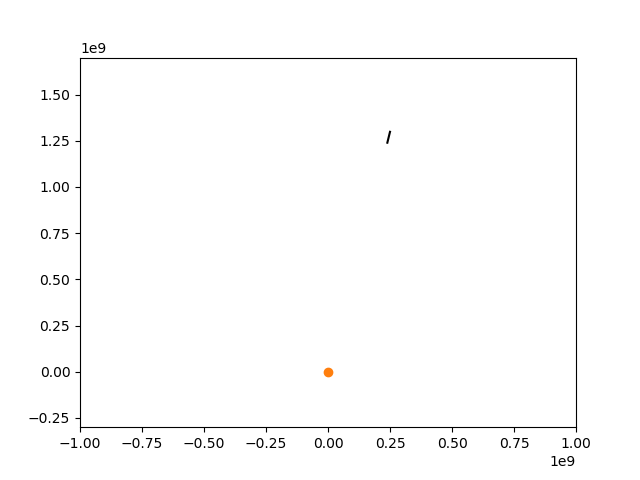

In [8]:


fig, ax = plt.subplots()

t = 0
x = sol[t,0]*np.cos(sol[t,2])
y = sol[t,0]*np.sin(sol[t,2])
point1,  = ax.plot(x,y, "o")


line1, =  ax.plot(x,y, "r")


saturno = ax.plot(0,0, "o", linewidth=1000)

point2,  = ax.plot(x,y, "o")


line3, =  ax.plot(x,y, "k")

def init():
    ax.set_ylim(-0.3e9, 1.7e9)
    ax.set_xlim(-1e9, 1e9)
    return point1,

def animate (i):
    x1=sol[i,0]*np.cos(sol[i,2]) + 100*l*np.cos(sol[i,4])
    y1=sol[i,0]*np.sin(sol[i,2]) + 100*l*np.sin(sol[i,4])
    x2= sol[i,0]*np.cos(sol[i,2]) - 100*l*np.cos(sol[i,4])
    y2=sol[i,0]*np.sin(sol[i,2]) - 100*l*np.sin(sol[i,4])
    xl = np.linspace(x2,x1)
    yl = np.linspace(y2,y1)
    line3.set_xdata(yl)
    line3.set_ydata(xl)
    return point1,

ani = animation.FuncAnimation(fig, animate, init_func=init, interval=1, blit=True, save_count=1)


plt.show()

<IPython.core.display.Javascript object>


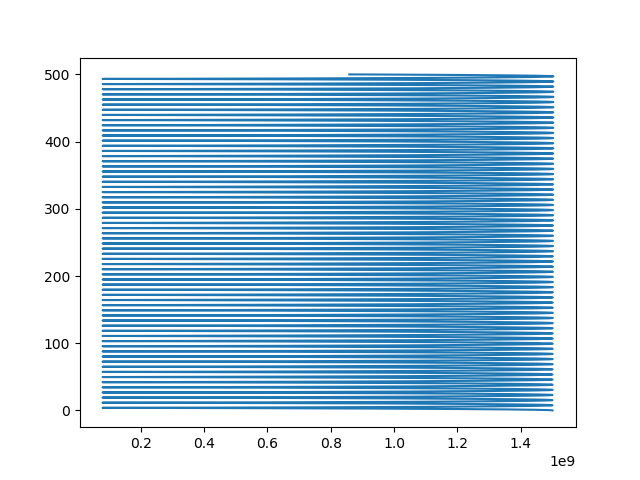

In [12]:
i= 3750
x1=sol[:i,0]*np.cos(sol[:i,2])
y1=sol[:i,0]*np.sin(sol[:i,2])
plt.plot(sol[:,0],sol[:,4])
plt.show()

In [22]:
i=0
a=1
ang=np.linspace(0,1,sol[:,0].size)
while (i<sol[:,0].size):
    if(sol[i,2]>a*2*np.pi):
        a=a+1
    ang[i] =sol[i,2]-(a-1)*2*np.pi
    i=i+1
    

In [23]:
sol[sol[:,0].size-1,2]


408.5605049848828

<IPython.core.display.Javascript object>


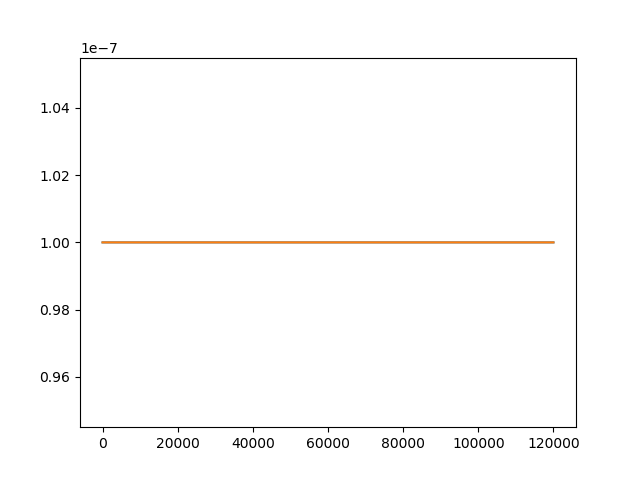

In [7]:
plt.plot(sol[:,5])
plt.show()

In [78]:
t = np.linspace(0, 5*10000000, 120000)

In [99]:
a=t[3750]
a=a/60
a=a/60
a=a/24
a

18.084641446086124

In [4]:
sim = rebound.Simulation()
sim.add(m=1)
sim.add(m=1e-3, a=1.0)

In [5]:
sim.integrate(1000)
sim.status()

---------------------------------
REBOUND version:     	3.6.2
REBOUND built on:    	Jun  5 2018 17:01:36
Number of particles: 	2
Selected integrator: 	ias15
Simulation time:     	1.0000000000000000e+03
Current timestep:    	0.175744
---------------------------------
<rebound.Particle object, m=1.0 x=0.0009018668853527916 y=0.9985061071382842 z=0.0 vx=0.0009947645590442104 vy=0.0009023177061167607 vz=0.0>
<rebound.Particle object, m=0.001 x=0.0981331146488877 y=1.9937679241785773 z=0.0 vx=-0.9947645590442068 vy=0.09818216894570074 vz=0.0>
---------------------------------


In [6]:
sim.getWidget()